# Homework 7: Hypothesis Testing

Please complete this notebook by filling in the cells provided. When you’re done, follow the instructions in [this short explainer video](https://www.youtube.com/watch?v=gMt_Rq43y_4&ab_channel=FahadKamran) to submit your homework.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/fa16/weekly.html](http://data8.org/fa16/weekly.html).

This assignment is due Thursday, October 27 at 7PM (note the new, later time!). You will receive an early submission bonus point if you turn it in by Wednesday, October 26 at 7PM. Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

Reading:
- Textbook chapter [10](https://www.inferentialthinking.com/chapters/10/testing-hypotheses.html) and chapter [11](https://www.inferentialthinking.com/chapters/11/estimation.html)

Run the cell below to prepare the notebook. There aren't any automated tests this time! Look for ways to check whether your answers are reasonable.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Hypothesis Testing Review
#### Games with Gary

Our friend Gary comes over and asks us to play a game with him. The game works like this: 

> We will flip a fair coin 10 times, and if the number of heads is greater than or equal to 5, we win!
> 
> Otherwise, Gary wins.

We play the game once and we lose, observing 3 heads.  We think the coin was rigged against us! Gary is adamant, however, that the coin was fair.

#### Question 1
Suppose you'd like to perform an hypothesis test in this scenario.  State the null and alternative hypotheses you would test.

**Null:** The coin is fair. The chance of obtaining heads is the same as the chance of obtaining tails.

**Alternative:** The coin is not fair and is rigged against us. There would be more `Tails` than `Heads`

#### Question 2
Define the function `coin_test_statistic`, which, given an array of any length containing the strings 'Heads' and 'Tails', returns an appropriate test statistic for this hypothesis test.

# ======== Written Answer ========
We define the `test statistic` as simply the number of `Heads` obtained from the coin flips.
# =============================

In [2]:
def coin_test_statistic(heads_and_tails_array):
    return np.count_nonzero(heads_and_tails_array == 'Heads')

# We recommend trying some examples here to ensure your code works as you intend.
# Here is one small example:
coin_test_statistic(make_array('Tails', 'Tails', 'Tails', 'Tails'))

0

We have created the function which simulates under the null hypothesis for you below. Examine the code and make sure you know exactly what it does. 

In [3]:
# Run this code and know what it does.  It may be helpful to
# write a docstring that documents the function.
def simulate_coin_under_null():
    # An array that will contain the test statistics
    statistics = make_array()
    for i in range(10000):
        # sample is an array of 'Heads or Tails', with length of 10
        sample = np.random.choice(make_array('Heads', 'Tails'), 10)
        # Compute the test statistic using the function that we defined earlier
        statistic = coin_test_statistic(sample)
        # Append the computed statistic above to the array statistics
        statistics = np.append(statistics, statistic)
    return statistics
simulated_coin_statistics = simulate_coin_under_null()
simulated_coin_statistics

array([4., 4., 6., ..., 6., 3., 9.])

#### Question 3
Find the p-value of our observation without using a histogram. Think about how you can use the variable `simulated_coin_statistics` defined in the code cell above. 

# ======== Written Answer ========
We define `p-value` as **the proportion of simulated coins statistics that are equal to the observed test statistic and that are further towards the alternative**. This means we will take into account test statistics that are `3` or lower.

In the observed case, we obtain 3 `Heads` out of 10 flips. Then `3` is the observed test statistic.

# =============================

In [4]:
coin_p_val = np.count_nonzero(simulated_coin_statistics <= 3) / simulated_coin_statistics.size
coin_p_val

0.1748

Gary asks us to play another game. This time, the game involves rolling a die. After playing 100 rounds of the game, we begin to suspect Gary's die isn't fair. Maybe we shouldn't play games with Gary anymore...

We would like to use hypothesis testing to decide whether or not Gary's die is fair.

**Question 4**

State the null and alternate hypotheses for this inference problem.

**Null:** The die is fair. Each face has an equal chance of appearing: 1/6.

**Alternative:** The die is not fair. The chance of each face appearing is not 1/6.

The table `rolls` contains the 100 die-roll outcomes from our games with Gary.

In [5]:
rolls = Table.read_table('rolls.csv')
rolls

roll
3
5
2
5
6
3
1
3
2
4


**Question 5**

Compute the proportion of each value for the die in the sample. Your output should be a table called `observed_proportions` with two columns:

- `value`: The value of the die (1 through 6).
- `proportion`: The proportion of rolls in `rolls` that have that value.

In [7]:
rolls.group('roll')

roll,count
1,13
2,26
3,21
4,16
5,9
6,15


In [8]:
# with_count is the rolls table, grouped by the count of each value
with_count = rolls.group('roll').relabel('roll', 'value')
# with_proportion is with_count with an additional column: the proportion
with_prop = with_count.with_column('proportion', with_count.column('count') / sum(with_count.column('count')))
observed_proportions = with_prop.drop('count')
observed_proportions

value,proportion
1,0.13
2,0.26
3,0.21
4,0.16
5,0.09
6,0.15


**Question 6**

Define a test statistic that you can use to determine whether or not the observed die is fair. The function should take as an argument an array of observed proportions, and it should return a single number representing the test statistic.

*Hint:* We want to compare the observed distribution of die values to the expected distribution of values.

# ================ Ans in Writings ==============
There are 6 values that we want to compare. In this case, we want to use TVD. Recall the steps for computing TVD:
1. Compute the **absolute difference** between each column
2. Sum the absolute differences
3. Divide by the number of rows involved

We are going to take the difference between the observed proportion and the expected proportion for each face, 1/6.
# ===========================================

In [9]:
def die_test_statistic(sample):
    return sum(abs(sample - 1/6)) / 6
    
observed_test_statistic = die_test_statistic(observed_proportions.column('proportion'))

The function below simulates under the null hypothesis. 

In [10]:
# Run this code and know what it does.
def simulate_die_under_null():
    statistics = make_array() # Array that stores all the statistics
    for i in range(5000):
        num_rolls = 100
        # Simulate 100 rolls
        rolls = Table().with_column("Face", np.random.choice(np.arange(1, 6+1), num_rolls))
        # Convert the count of each face to proportion
        proportions = rolls.group("Face").sort("Face").column("count") / num_rolls
        # Calculates the test statistic
        statistic = die_test_statistic(proportions)
        # Append the test statistic to the array statistics
        statistics = np.append(statistics, statistic)
    return statistics
simulated_die_statistics = simulate_die_under_null()
simulated_die_statistics

array([0.04333333, 0.01888889, 0.02555556, ..., 0.02666667, 0.04      ,
       0.01555556])

**Question 7**

Find the p-value of our observation without using a histogram. Think about how you can use the variable `simulated_die` defined in the code cell above.

*Hint:* Our observed test statistic is represented by the variable called `observed_test_statistic`.

In [11]:
die_p_val = np.count_nonzero(simulated_die_statistics >= observed_test_statistic) / simulated_die_statistics.size
die_p_val

0.0758

## 2. Plot the Vote


Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters* - the proportions of each kind of voter in the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `voters` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [20]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

vote
U
C
T
C
C
C
T
T
C
T


Below, we have give you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**.

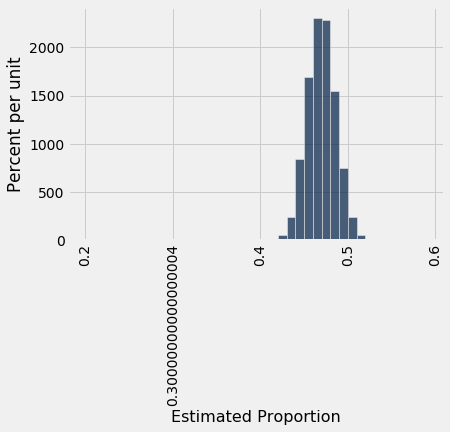

In [21]:
def proportions_in_resamples():
    statistics = make_array()
    for i in np.arange(5000):
        # Bootstrap using sample()
        bootstrap = votes.sample()
        # the statistic is defined by the proportion of votes of C
        sample_statistic = np.count_nonzero(bootstrap.column('vote') == 'C')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples()
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 1.** Using the array `sampled_proportions`, compute an approximate 95% confidence interval for the true proportions of voters planning on voting for candidate C.  (Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.)

In [22]:
lower_bound = percentile(2.5, sampled_proportions)
upper_bound = percentile(97.5, sampled_proportions)
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(lower_bound, upper_bound))

Bootstrapped 95% confidence interval for the proportion of C voters in the population: [0.439000, 0.501000]


**Question 2.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use CI's to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

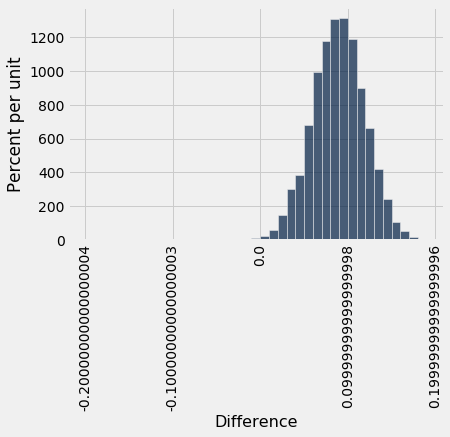

In [15]:
bins = bins=np.arange(-0.2,0.2,0.01)

def leads_in_resamples():
    statistics = make_array()
    for i in np.arange(5000):
        # Take bootstrap
        bootstrap = votes.sample()
        # Compute vote counts for C and T
        count_C = np.count_nonzero(bootstrap.column('vote') == 'C')
        count_T = np.count_nonzero(bootstrap.column('vote') == 'T')
        # Calculate the statistic
        statistic = (count_C - count_T) / num_votes
        # Append the calculated statistic to the array statistics
        statistics = np.append(statistics, statistic)
    return statistics

sampled_leads = leads_in_resamples()
Table().with_column("Difference", sampled_leads).hist(bins = bins)

In [16]:
lower_bound = percentile(2.5, sampled_leads)
upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(lower_bound, upper_bound))

Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [0.030000, 0.147000]


## 3. Interpreting Confidence Intervals


The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer might have been different; that doesn't mean it was wrong.)

#### Question 1
Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

**Answer:**
No. This confidence interval has nothing to do with the population or the distribution of the population. 

#### Question 2
Can we say that there is a 95% probability that the interval [.439, .5] contains the true proportion of the population who is voting for Candidate C? Explain your answer.

**Answer:** No.

The definition of 95% confidence interval is that **95% of the time, if we take a new sample and generate a 95% confidence interval, the true proportion of the population that vote for candidate C will be within that interval**.

It's NOT saying that there's a 95% probability that the interval contains the true proportion of the population that vote for candidate C.

#### Question 3
Suppose we produced 10,000 new samples (each one a uniform random sample of 1,000 voters) and created a 95% confidence interval from each one. Roughly how many of those 10,000 intervals do you expect will actually contain the true proportion of the population?

**Answer:** 95% of 10,000, or 9,500. The 95% confidence interval means that 95% of the time, if we take a new sample and generate a 95% confidence interval, the true proportion of the population that vote for candidate C would be within that interval.

**Question 4**

The staff also created 80%, 90%, and 99% confidence intervals from one sample, but we forgot to label which confidence interval represented which percentages! Match the interval to the percent of confidence the interval represents. (Write the percentage after each interval below.) **Then**, explain your thought process.

In [17]:
abs(.444 - .495)

0.05099999999999999

In [18]:
abs(.45 - .49)

0.03999999999999998

In [19]:
abs(.43 - .511)

0.08100000000000002

**Answers:**

$[.444,.495]$: 90%

$[.45,.49]$: 80%

$[.43,.511]$: 99%

The greater the % of the confidence interval, the wider the interval. The wider the interval, the greater the difference between the upper-bound and the lower-bound of the interval. 

1. The interval with the greatest upper-lower bound difference should be the 99%
2. The interval with the lowest upper-lower bound difference should be the 80%
3. The remaining should be the 90%.

#### Question 5

Recall the second bootstrap confidence interval you created, estimating Candidate C's lead over Candidate T. Among voters in the sample, her lead was .09. The staff's 95% confidence interval for her true lead (in the population of all voters) was

$$[.032,.15].$$

Suppose we are interested in testing a simple yes-or-no question:

> "Are the candidates tied?"

Our null hypothesis is that the proportions are equal, or, equivalently, that Candidate C's lead is exactly 0. Our alternative hypothesis is that her lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only the staff's 95% confidence interval.


**Question:** Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

**Answer:** Reject.

In this case, P-value is the proportion of `test statistic` (in this case, Candidate C's lead) that is equal to the observed test statistic or more towards the alternative. 

The null hypothesis is that the lead is `0`. The interval does not contain `0`. 

#### Question 6
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using our confidence interval?

**Answer:** We are unable to tell using the 95% confidence interval.. We would have to compute the 99% confidence interval and see whether `0` is within the interval.

#### Question 7
What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

**Answer:** Reject.

If we know that `0` is not within the 95% confidence interval, it is more obvious that it is not within the 90% confidence interval.